# Unveiling Insights into Northwind Traders – A Deep Dive with SQL

## 1. Introduction

Imagine we are data analysts at **Northwind Traders**, an international gourmet food distributor. Management is seeking insights to inform strategic decisions across various aspects of the business. Our projects are focused on:

- Evaluating employee performance to enhance productivity.
- Understanding product sales and category performance to optimize inventory and marketing strategies.
- Analyzing sales growth to identify trends, track company progress, and generate more accurate forecasts.
- Evaluating customer purchasing behavior to target high-value customers with promotional incentives.

By leveraging **PostgreSQL** window functions on the [Northwind database](https://github.com/pthom/northwind_psql/tree/master), which offers a real-world platform for exploring and analyzing sales data, we will deliver essential insights to management. As a result, we will make a significant contribution to the company's strategic decisions.

The database schema offers an overview of the [Northwind database](https://github.com/pthom/northwind_psql/tree/master)'s tables, columns, and relationships. In addition, the database contains over a dozen tables, most of which we won't need for this project. Below is a modified diagram showing the necessary tables, but we can also refer to the original schema [here](https://github.com/pthom/northwind_psql/blob/master/ER.png).

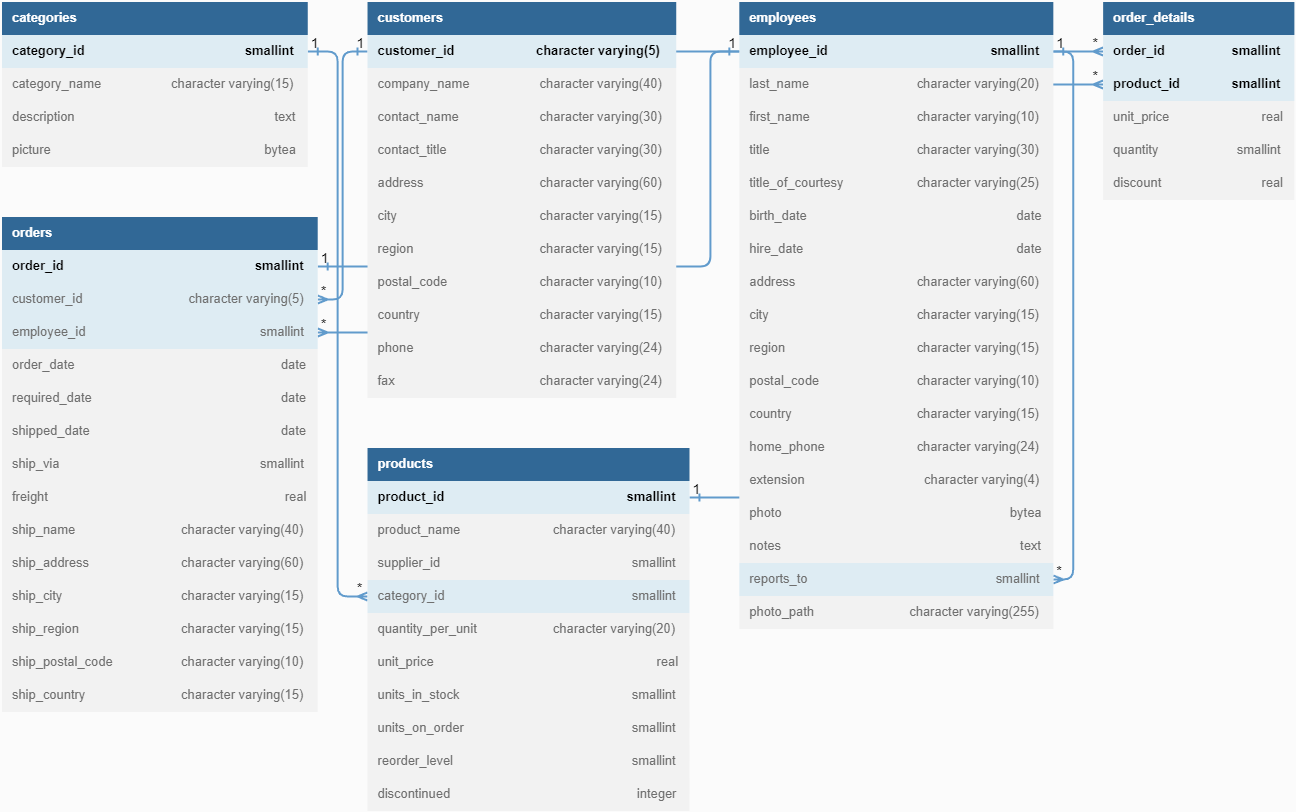

## 2. Exploring the PostgreSQL Northwind Database

First, we aim to establish a connection to the PostgreSQL Northwind database. Let's begin by importing the necessary libraries, defining the connection parameters, then connecting to the database.

In [1]:
# Import the relevant libraries
import psycopg2
import pandas as pd

# Define the connection parameters
conn_params = {
    "host": "localhost",
    "port": 5432,
    "database": "northwind",
    "user": "postgres",
    "password": "Annuitcoeptis12"}

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(**conn_params)
cur = conn.cursor()

Next, let's start by familiarizing ourselves with the data in the Northwind database. Initially, we aim to retrieve a list of all tables and views in the PostgreSQL database.

In [2]:
# Retrieve table names and types from the 'public' schema,
# and limit the result to base tables and views
cur.execute("""SELECT table_name,
                      table_type
                 FROM information_schema.tables
                WHERE table_schema = 'public' AND table_type IN ('BASE TABLE', 'VIEW');""")

# Fetch all rows from the result set, and create a DataFrame with specified column names
rows = cur.fetchall()
results = pd.DataFrame(rows, columns=['table_name', 'table_type'])
results

,table_name,table_type
0,territories,BASE TABLE
1,order_details,BASE TABLE
2,employee_territories,BASE TABLE
3,us_states,BASE TABLE
4,customers,BASE TABLE
5,orders,BASE TABLE
6,employees,BASE TABLE
7,shippers,BASE TABLE
8,products,BASE TABLE
9,categories,BASE TABLE


The output provides insights into the tables present in the Northwind database. It includes tables such as `territories`, `order_details`, `customers`, `employees`, and more. These tables seem to represent different aspects of the business, such as customer information, products, orders, and regions.

Now, let's combine the `orders` and `customers` tables to obtain more detailed information about each order.

In [3]:
# Retrieve specific columns from the 'orders' and 'customers' tables,
# joining them based on corresponding IDs, and limit the output to the first 5 rows
cur.execute("""SELECT o.order_id,
                      c.company_name,
                      c.contact_name,
                      o.order_date
                 FROM orders o
                 JOIN customers c ON o.customer_id = c.customer_id
                LIMIT 5;""")

# Fetch all rows from the result set, and create a DataFrame with specified column names
rows = cur.fetchall()
results = pd.DataFrame(rows, columns=['order_id', 'company_name', 'contact_name', 'order_date'])
results

,order_id,company_name,contact_name,order_date
0,10248,Vins et alcools Chevalier,Paul Henriot,1996-07-04
1,10249,Toms Spezialitäten,Karin Josephs,1996-07-05
2,10250,Hanari Carnes,Mario Pontes,1996-07-08
3,10251,Victuailles en stock,Mary Saveley,1996-07-08
4,10252,Suprêmes délices,Pascale Cartrain,1996-07-09


The output displays a snapshot of orders from different companies within the dataset. Each row represents a specific order, showing the order ID, company name, contact person, and order date. For example, the first row indicates an order made by `Vins et alcools Chevalier` with the contact person `Paul Henriot` on `July 4, 1996`. Similarly, subsequent rows provide details of orders placed by other companies on different dates. This information offers a glimpse into the customer base within the dataset.

Next, let's combine the `orders` and `employees` tables to determine the employee responsible for each order.

In [4]:
# Retrieve specific columns from the 'orders' and 'employees' tables,
# joining them based on corresponding IDs, and limit the output to the first 5 rows
cur.execute("""SELECT e.first_name || ' ' || e.last_name AS employee_name,
                      o.order_id,
                      o.order_date
                 FROM orders o
                 JOIN employees e ON o.employee_id = e.employee_id
                LIMIT 5;""")

# Fetch all rows from the result set, and create a DataFrame with specified column names
rows = cur.fetchall()
results = pd.DataFrame(rows, columns=['employee_name', 'order_id', 'order_date'])
results

,employee_name,order_id,order_date
0,Steven Buchanan,10248,1996-07-04
1,Michael Suyama,10249,1996-07-05
2,Margaret Peacock,10250,1996-07-08
3,Janet Leverling,10251,1996-07-08
4,Margaret Peacock,10252,1996-07-09


The output provides insights into the employees responsible for processing orders within the dataset. Each row indicates an order handled by a specific employee, showing their full name alongside the order ID and the respective order date. For instance, `Steven Buchanan` processed order `10248` on `July 4, 1996`, followed by `Michael Suyama`, `Margaret Peacock`, and `Janet Leverling`, who processed subsequent orders on different dates. This information offers visibility into employee performance and their involvement in order fulfillment.

Now, let's combine the `order_details`, `products`, and `orders` tables to obtain detailed order information, including the product name and quantity.

In [5]:
# Retrieve specific columns from the 'order_details', 'products', and 'orders' tables,
# joining them based on corresponding IDs, and limit the output to the first 5 rows
cur.execute("""SELECT o.order_id,
                      p.product_name,
                      od.quantity,
                      o.order_date
                 FROM order_details od
                 JOIN products p ON od.product_id = p.product_id
                 JOIN orders o ON od.order_id = o.order_id
                ORDER BY o.order_id, od.quantity
                LIMIT 5;""")

# Fetch all rows from the result set, and create a DataFrame with specified column names
rows = cur.fetchall()
results = pd.DataFrame(rows, columns=['order_id', 'product_name', 'quantity', 'order_date'])
results

,order_id,product_name,quantity,order_date
0,10248,Mozzarella di Giovanni,5,1996-07-04
1,10248,Singaporean Hokkien Fried Mee,10,1996-07-04
2,10248,Queso Cabrales,12,1996-07-04
3,10249,Tofu,9,1996-07-05
4,10249,Manjimup Dried Apples,40,1996-07-05


The output reveals specific orders from the dataset, detailing the products purchased, quantities ordered, and the corresponding order dates. For instance, order `10248` includes items like `Mozzarella di Giovanni`, `Singaporean Hokkien Fried Mee`, and `Queso Cabrales`, each with varying quantities, all ordered on `July 4, 1996`. Such information offers insights into the types of products ordered and their quantities, aiding in understanding purchasing patterns within the dataset.

## 3. Ranking Employees by Sales Performance

As the lead data analyst at Northwind Traders, we've been tasked with comprehensively reviewing the company's sales performance from an employee perspective. The objective is twofold:

- First, the management team wants to recognize and reward top-performing employees, fostering a culture of excellence within the organization.
- Second, they want to identify employees who might be struggling, so that they can offer the necessary training or resources to help them improve.

The management team is keen on encouraging healthy competition and rewarding stellar performers. Hence, they've asked us to rank the `9` employees in the company based on their total sales amount.

In [6]:
# Calculate total sales for each employee, and rank them based on sales performance
cur.execute("""WITH employee_sales AS (
                   SELECT e.employee_id, e.first_name || ' ' || e.last_name AS "employee_name",
                          SUM(od.unit_price * od.quantity * (1 - od.discount)) AS "total_sales"
                     FROM orders o
                     JOIN employees e ON o.employee_id = e.employee_id
                     JOIN order_details od ON o.order_id = od.order_id
                    GROUP BY e.employee_id
               )
               SELECT employee_id, employee_name,
                      RANK() OVER (ORDER BY "total_sales" DESC) AS "sales_rank"
                 FROM employee_sales;""")

# Fetch all rows from the result set, and create a DataFrame with specified column names
rows = cur.fetchall()
results = pd.DataFrame(rows, columns=['employee_id', 'employee_name', 'sales_rank'])
results

,employee_id,employee_name,sales_rank
0,4,Margaret Peacock,1
1,3,Janet Leverling,2
2,1,Nancy Davolio,3
3,2,Andrew Fuller,4
4,8,Laura Callahan,5
5,7,Robert King,6
6,9,Anne Dodsworth,7
7,6,Michael Suyama,8
8,5,Steven Buchanan,9


The output ranks employees based on their sales performance, with `Margaret Peacock` securing the top position followed by `Janet Leverling`, `Nancy Davolio`, and `Andrew Fuller`. Additionally, `Laura Callahan`, `Robert King`, `Anne Dodsworth`, `Michael Suyama`, and `Steven Buchanan` complete the ranking. This information aids in identifying top and worst performers, providing insights for recognition and improvement initiatives within the organization.

## 4. Calculating the Running Total of Monthly Sales

Next, the management is eager to gain a broader view of the company's sales performance over time. They aim to visualize monthly sales progress and identify trends that might shape the company's future strategies. This will involve aggregating monthly sales data and calculating a **running total of sales** by month, offering clear insights into sales trends and identifying periods of high or low activity.

In [7]:
# Calculate monthly sales and generate a running total
cur.execute("""WITH monthly_sales AS (
                   SELECT DATE_TRUNC('month', o.order_date)::DATE AS "month", 
                          SUM(od.unit_price * od.quantity * (1 - od.discount)) AS "total_sales"
                     FROM orders o
                     JOIN order_details od ON o.order_id = od.order_id
                    GROUP BY DATE_TRUNC('month', o.order_date)
               )
               SELECT "month", 
                      ROUND(SUM("total_sales") OVER (ORDER BY "month")::NUMERIC, 2) AS "running_total"
                 FROM monthly_sales;""")

# Fetch all rows from the result set, and create a DataFrame with specified column names
rows = cur.fetchall()
results = pd.DataFrame(rows, columns=['month', 'running_total'])
results

,month,running_total
0,1996-07-01,27861.90
1,1996-08-01,53347.17
2,1996-09-01,79728.57
3,1996-10-01,117244.30
4,1996-11-01,162844.34
5,1996-12-01,208083.97
6,1997-01-01,269342.04
7,1997-02-01,307825.68
8,1997-03-01,346372.90
9,1997-04-01,399405.85


The output displays the running total of sales over time, with sales increasing steadily from `July 1996` to `May 1998`. Also, there's a noticeable uptrend indicating continuous growth in sales revenue throughout the period. This provides a clear overview of the company's sales performance, highlighting periods of significant growth and potential areas for further analysis or strategic focus.

## 5. Analyzing the Month-over-Month Sales Growth Rate

After presenting the running sales total by month, the management team is interested in further dissecting these figures. They would like to analyze the month-over-month sales growth rate. Understanding the rate at which sales are increasing or decreasing from month to month will help the management team identify significant trends.

For this task, we'll need to calculate the percentage change in sales from one month to the next using the previous results. This can provide a clear picture of the periods of growth or contraction, informing business strategy and decision-making.

In [8]:
# Calculate the month-over-month sales growth rate
cur.execute("""WITH monthly_sales AS (
                   SELECT EXTRACT('year' from o.order_date) AS year,
                          EXTRACT('month' from o.order_date) AS month, 
                          SUM(od.unit_price * od.quantity * (1 - od.discount)) AS month_sales
                     FROM orders o
                     JOIN order_details od ON o.order_id = od.order_id
                    GROUP BY EXTRACT('month' from o.order_date), EXTRACT('year' from o.order_date)
               ),
               lagged_sales AS (
                   SELECT year, month,
                          month_sales, 
                          LAG(month_sales) OVER (ORDER BY year, month) AS previous_month_sales
                     FROM monthly_sales
               )
               SELECT year, month,
                      ROUND(((month_sales - previous_month_sales) / 
                             previous_month_sales * 100)::NUMERIC, 2) AS "growth_rate"
                 FROM lagged_sales;""")

# Fetch all rows from the result set, and create a DataFrame with specified column names
rows = cur.fetchall()
results = pd.DataFrame(rows, columns=['year', 'month', 'growth_rate'])
results

,year,month,growth_rate
0,1996,7,None
1,1996,8,-8.53
2,1996,9,3.52
3,1996,10,42.21
4,1996,11,21.55
5,1996,12,-0.79
6,1997,1,35.41
7,1997,2,-37.18
8,1997,3,0.17
9,1997,4,37.58


The output illustrates the month-over-month sales growth rate, indicating fluctuations in sales performance throughout the years. Also, there are notable periods of both growth and decline. For instance, sales experienced a substantial increase in growth rate in `October 1996`, followed by a deceleration in `November` of the same year. Similarly, there were significant fluctuations in sales during the subsequent months, highlighting the dynamic nature of sales trends within the dataset.

## 6. Identifying Customers with Above-Average Order Values

Now, the management team wants to identify high-value customers to whom they can offer targeted promotions and special offers, which could drive increased sales and improve customer retention. To do this, they've asked us to identify customers with **above-average order values**. These customers might be businesses buying in bulk or individuals purchasing high-end products.

In [9]:
# Categorize customers based on their order values, and limit the output to the first 5 rows
cur.execute("""WITH order_values AS (
                   SELECT o.customer_id, 
                          o.order_id, 
                          ROUND(SUM(od.unit_price * od.quantity * (1 - od.discount))::NUMERIC, 2) 
                       AS "order_value"
                     FROM orders o
                     JOIN order_details od ON o.order_id = od.order_id
                    GROUP BY o.customer_id, o.order_id
               )
               SELECT customer_id, 
                      order_id, 
                      "order_value",
                 CASE 
                     WHEN "order_value" > AVG("order_value") OVER () THEN 'Above Average'
                     ELSE 'Below Average'
                  END AS "value_category"
                 FROM order_values
                LIMIT 5;""")

# Fetch all rows from the result set, and create a DataFrame with specified column names
rows = cur.fetchall()
results = pd.DataFrame(rows, columns=['customer_id', 'order_id', 'order_value', 'value_category'])
results

,customer_id,order_id,order_value,value_category
0,VINET,10248,440.00,Below Average
1,TOMSP,10249,1863.40,Above Average
2,HANAR,10250,1552.60,Above Average
3,VICTE,10251,654.06,Below Average
4,SUPRD,10252,3597.90,Above Average


The output showcases the order values for customers along with their classification as `Above Average` or `Below Average` based on their respective order values. For instance, customers like `VINET` and `VICTE` fall into the `Below Average` category, indicating their orders are lower compared to the average order value. Conversely, customers like `TOMSP`, `HANAR`, and `SUPRD` are classified as `Above Average`, suggesting their orders exceed the average order value, reflecting potentially higher purchasing activity or larger transactions.

## 7. Computing the Sales Percentage for Each Product Category

We need to provide the management team with an understanding of sales composition across different product categories. By knowing the percentage of total sales for each product category, we can gain insights into which categories drive most of the company's sales. This understanding will help guide decisions about inventory, including which categories should be stocked more heavily, as well as marketing strategies to determine which categories should be promoted more aggressively.

In [10]:
# Calculate sales percentage for each product category
cur.execute("""WITH category_sales AS (
                   SELECT c.category_id, c.category_name,
                          SUM(p.unit_price * od.quantity * (1 - od.discount)) AS "total_sales"
                     FROM categories c
                     JOIN products p ON c.category_id = p.category_id
                     JOIN order_details od ON p.product_id = od.product_id
                    GROUP BY c.category_id
               )
               SELECT category_id, category_name,
                      ROUND(("total_sales" / SUM("total_sales") OVER () * 100)::NUMERIC, 2) 
                   AS "sales_percentage"
                 FROM category_sales
                ORDER BY sales_percentage DESC;""")

# Fetch all rows from the result set, and create a DataFrame with specified column names
rows = cur.fetchall()
results = pd.DataFrame(rows, columns=['category_id', 'category_name', 'sales_percentage'])
results

,category_id,category_name,sales_percentage
0,1,Beverages,21.33
1,4,Dairy Products,18.56
2,3,Confections,13.29
3,6,Meat/Poultry,12.90
4,8,Seafood,10.20
5,2,Condiments,8.40
6,7,Produce,7.81
7,5,Grains/Cereals,7.51


The output shows the sales percentage for each product category, indicating the contribution of each category to total sales. `Beverages` and `Dairy Products` are the top-selling categories, accounting for `21.33%` and `18.56%` of total sales, respectively. Also, `Confections` and `Meat/Poultry` follow, each contributing over `10%` to total sales. Other categories like `Seafood`, `Condiments`, `Produce`, and `Grains/Cereals` make up the rest of the sales distribution, each contributing around `10%` or less to the total sales.

## 8. Identifying the Top Products in Each Product Category

With the knowledge of sales by category, the next step is to drill down further into each group. The management team wants to know the top three items sold in each product category. This will allow them to identify star performers, and ensure that these products are kept in stock and marketed prominently.

In [11]:
# Calculate total sales for each product, and identify the top three selling products in each category
cur.execute("""WITH product_sales AS (
                   SELECT p.category_id, 
                          p.product_id, p.product_name,
                          ROUND(SUM(p.unit_price * od.quantity * (1 - od.discount))::NUMERIC, 2) 
                       AS "total_sales"
                     FROM products p
                     JOIN order_details od ON p.product_id = od.product_id
                    GROUP BY p.category_id, p.product_id
               )
               SELECT category_id, 
                      product_id, product_name,
                      "total_sales"
                 FROM (
                      SELECT category_id, 
                             product_id, product_name,
                             "total_sales", 
                             ROW_NUMBER() OVER (PARTITION BY category_id ORDER BY "total_sales" DESC)
                          AS row_num
                        FROM product_sales
                 ) tmp
                WHERE row_num <= 3;""")

# Fetch all rows from the result set, and create a DataFrame with specified column names
rows = cur.fetchall()
results = pd.DataFrame(rows, columns=['category_id', 'product_id', 'product_name', 'total_sales'])
results

,category_id,product_id,product_name,total_sales
0,1,38,Côte de Blaye,153897.17
1,1,43,Ipoh Coffee,25109.10
2,1,2,Chang,17719.40
3,2,63,Vegie-spread,18343.62
4,2,61,Sirop d'érable,15022.35
5,2,65,Louisiana Fiery Hot Pepper Sauce,14893.93
6,3,62,Tarte au sucre,50737.09
7,3,20,Sir Rodney's Marmalade,24199.56
8,3,26,Gumbär Gummibärchen,21662.69
9,4,59,Raclette Courdavault,76683.75


The output highlights the top `3` selling products within each product category, presenting their total sales figures. This breakdown will allow the management team to not only identify high-performing products, but also discern trends in consumer preferences across different categories. Such insights facilitate strategic decisions regarding inventory management and promotional campaigns to maximize profitability and meet customer demands effectively.

In [12]:
# Close the cursor and connection
cur.close()
conn.close()

## 9. Conclusion

In this project, we acted as data analysts at **Northwind Traders** to explore and analyze sales data from the **PostgreSQL** Northwind database. After establishing a connection with the database, we retrieved a list covering all its tables and views. This list uncovered tables representing various facets of the business, including customer information, products, orders, and regions.

In addition, we combined several different tables to obtain more detailed information about orders, determine the employees responsible for processing them, and retrieve information about product names and quantities. As a result, we provided insight into the customer base, employee performance and their involvement in order fulfillment. Moreover, we discovered the types of products ordered and their quantities, aiding in understanding purchasing patterns within the dataset.

We ranked all employees at Northwind Traders based on their total sales amount, with `Margaret Peacock` securing the top position followed by `Janet Leverling` and `Nancy Davolio`. On the other hand, `Steven Buchanan`, `Michael Suyama`, and `Anne Dodsworth` make up the bottom three in terms of sales performance.

To visualize monthly sales progress, we aggregated monthly sales data and calculated a running total of sales by month. Overall, sales increased steadily from `July 1996` to `May 1998`, indicating continuous growth in sales revenue throughout the period. Consequently, we calculated the month-over-month sales growth rate, which indicated fluctuations in sales performance. For instance, sales experienced a substantial increase in growth rate in `October 1996`, followed by a deceleration in the following month.

We defined high-value customers as those with above-average order values, to whom we can offer targeted promotions and special offers. Based on the first few order IDs, the customers `VINET` and `VICTE` fell into the `Below Average` category, whereas `TOMSP`, `HANAR`, and `SUPRD` were classified as `Above Average`, suggesting that their orders exceeded the average order value.

By knowing the percentage of total sales for each product category, we spotted which categories drive most of the company's sales. The categories `Beverages` and `Dairy Products` are the top-selling, whereas `Condiments`, `Produce`, and `Grains/Cereals` make up the bottom categories. Furthermore, we identified the top `3` selling products in each category, which not only revealed high-performing products, but also trends in consumer preferences across different categories.